# ECSE415 - Intro to Computer Vision
## Tutorial 6 - Classification (using Scikit-Learn)

A machine learning problem consists of $n$ instances of data and attempts to predict properties of unseen data.

Learning problems can be separated into several categories:
* Supervised Learning: data comes with additional attributes that we want to predict. This problem can be either:
 * Classification: Samples belong to two or more classes and the algorithm learns from already labeled data to         predict to class of unseen data.
 * Regression: the desired output consists of one or more continuous variables.
* Unsupervised Learning: data consists of a set of input vectors without any corresponding target values. Examples include clustering, density estimation, etc.

Input data dimensions: (1797, 64)
Output data dimensions: (1797,)
Input data:


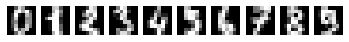

Output labels:
[0 1 2 3 4 5 6 7 8 9]


In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt

digits = datasets.load_digits()

print("Input data dimensions:", digits.data.shape)
print("Output data dimensions:", digits.target.shape)

print("Input data:")
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(digits.data[i].reshape(8,8), cmap='gray'); plt.axis('off')
plt.show()

print("Output labels:")
print(digits.target[0:10])

The task is to predict the output label (number from 0-9) for each input image. Since we are provided with examples of each of the 10 possible classes, we can now attempt to *fit* an estimator to be able to *predict* the classes to which unseen samples belong.

# We can begin by looking at a Support Vector Machine.
sklearn's tutorial is a very good resource to learn about SVM:
https://scikit-learn.org/stable/modules/svm.html#

1. We will try LinearSVM and non-linear SVM with RBF kernel on the raw data.
2. We will try non-linear SVM with RBF kernel on the LBP and HoG features of the data.

Linear SVM on the raw data

Predicted Label: [0 8 9 8]
Actual Label: [0 8 9 8]


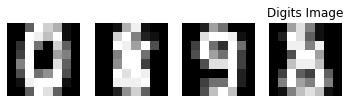

In [ ]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

clf = svm.LinearSVC(C=0.001)
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
        
# training, let's use all the data but the last 4 instances
clf.fit(digits.data[:-4], digits.target[:-4])
# now predict the label for the last 2 instances
print("Predicted Label:", clf.predict(digits.data[-4:]))
print("Actual Label:", digits.target[-4:])

# plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(digits.data[-4].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(142), plt.imshow(digits.data[-3].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(143), plt.imshow(digits.data[-2].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(144), plt.imshow(digits.data[-1].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title("Digits Image")
plt.show()

Non-linear SVM with RBF kernel on the raw data

Predicted Label: [0 8 9 8]
Actual Label: [0 8 9 8]


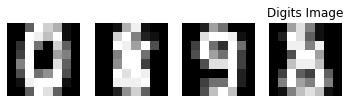

In [ ]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

clf = svm.SVC(gamma=0.001, C=100.)
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# other important arguments:
# class_weight : {dict, ‘balanced’}
# tol : float, default=1e-3
# max_iter : int, default=-1
# kernel : string, default='rbf'. You have more options available. Check the documentation.
        
# training, let's use all the data but the last 4 instances
clf.fit(digits.data[:-4], digits.target[:-4])
# now predict the label for the last 2 instances
print("Predicted Label:", clf.predict(digits.data[-4:]))
print("Actual Label:", digits.target[-4:])

# plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(digits.data[-4].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(142), plt.imshow(digits.data[-3].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(143), plt.imshow(digits.data[-2].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(144), plt.imshow(digits.data[-1].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title("Digits Image")
plt.show()

Non-linear SVM with RBF kernel on the LBP features of the data

Predicted Label: [0 8 9 2]
Actual Label: [0 8 9 8]


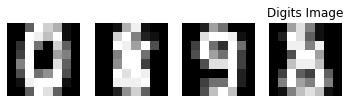

In [ ]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
import numpy as np

digits = datasets.load_digits()

features = []
for i in range(digits.data.shape[0]):
    features.append(local_binary_pattern(digits.data[i].reshape(8,8), 8, 1, method='uniform')) # data, P, R
features = np.stack(features).reshape(-1, 64)

clf = svm.SVC(gamma=0.001, C=100.) 
# tune value of gamma manually
# try gamma=0.001, 'auto', 'scale'

clf.fit(features[:-4], digits.target[:-4])
# now predict the label for the last 2 instances
print("Predicted Label:", clf.predict(features[-4:]))
print("Actual Label:", digits.target[-4:])

# plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(digits.data[-4].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(142), plt.imshow(digits.data[-3].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(143), plt.imshow(digits.data[-2].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(144), plt.imshow(digits.data[-1].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title("Digits Image")
plt.show()

Non-linear SVM with RBF kernel on the HoG features of the data

Predicted Label: [0 8 9 8]
Actual Label: [0 8 9 8]


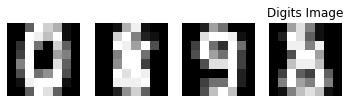

In [ ]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_size = (8, 8) # h x w in pixels
cell_size = (2, 2)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 4  # number of orientation bins

# create HoG Object
# winSize is the size of the image cropped to multiple of the cell size
# all arguments should be given in terms of number of pixels
hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                  img_size[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

digits = datasets.load_digits()

features = []
for i in range(digits.data.shape[0]):
    features.append(hog.compute(digits.data[i].reshape(8,8).astype(np.uint8)).reshape(1, -1))
features = np.vstack(features)

clf = svm.SVC(gamma='auto', C=100.) 

clf.fit(features[:-4], digits.target[:-4])
# now predict the label for the last 2 instances
print("Predicted Label:", clf.predict(features[-4:]))
print("Actual Label:", digits.target[-4:])

# plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(digits.data[-4].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(142), plt.imshow(digits.data[-3].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(143), plt.imshow(digits.data[-2].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(144), plt.imshow(digits.data[-1].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title("Digits Image")
plt.show()

Let's try to understand the parameter 'C'

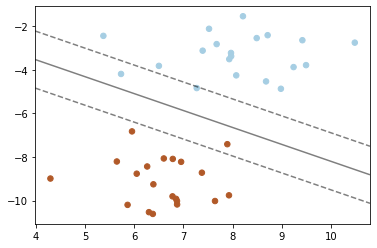

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6, cluster_std=1)

# fit the model, don't regularize for illustration purposes
# clf = svm.SVC(kernel='linear', C=1)
clf = svm.LinearSVC(C=1)
# importance of C: Higher the value of C, smaller the margin.
# try values: 0.001, 1, 1000000

clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# uncomment next line to plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
plt.show()

#Now let's look at Random Forest
Again, sklearn documentation is a great source to learn about bagging/boosting techniques.

https://scikit-learn.org/stable/modules/ensemble.html

Predicted Label: [0 8 9 8]
Actual Label: [0 8 9 8]


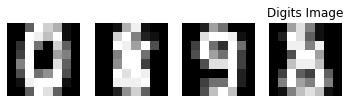

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# training, let's us all the data but the last 4 instances
clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy')
# Other important arguments:
# min_samples_split : int, float, optional (default=2)
# min_samples_leaf : int, float, optional (default=1)
# max_features : int, float, string or None, optional (default=”auto”)
# max_leaf_nodes : int or None, optional (default=None)

clf.fit(digits.data[:-4], digits.target[:-4])
# now predict the label for the last 2 instances
print("Predicted Label:", clf.predict(digits.data[-4:]))
print("Actual Label:", digits.target[-4:])

# plt.figure(figsize=(10,10))
plt.subplot(141), plt.imshow(digits.data[-4].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(142), plt.imshow(digits.data[-3].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(143), plt.imshow(digits.data[-2].reshape(8,8), cmap='gray'); plt.axis('off')
plt.subplot(144), plt.imshow(digits.data[-1].reshape(8,8), cmap='gray'); plt.axis('off')
plt.title("Digits Image")
plt.show()

sklearn also has facility to perform multiclass multilabel classification

What is multilabel classification?

Let's assume we want to classify animals into two categories: (0) animals that live on land (1) animals that live in water. Let's consider a few examples of (data - label) pairs:

* cow - 0
* fish - 1
* turtle - 0,1

This is a multilabel classification problem. The datapoints may have multiple labels.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer

classif = OneVsRestClassifier(estimator = SVC(random_state=0))

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]       # data
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]    # each data-points belongs to multiple classes
y = MultiLabelBinarizer().fit_transform(y)
print('Binarized labels:\n', y)
print('Predicted labels:\n', classif.fit(X, y).predict(X))

Binarized labels:
 [[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 1 0]
 [0 0 1 0 1]]
Predicted labels:
 [[1 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 0 1 0 0]]
